In [1]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix,f1_score
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('address_data_combined.csv')

In [3]:
X = df.drop(columns=['Address', 'FLAG'])
y = df['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [4]:
import numpy as np

columns = ['Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)',
       'Unique Received From Addresses', 'min value received',
       'max value received ', 'avg val received', 'min val sent',
       'avg val sent', 'total transactions (including tnx to create contract',
       'total ether received', 'total ether balance']

scaler = MinMaxScaler()

# Log for Skewed Data
for c in columns:
  X_train[c] = X_train[c].apply(lambda x: np.log(x) if x > 0 else 0)
  X_test[c] = X_test[c].apply(lambda x: np.log(x) if x > 0 else 0)

# Scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

np.isnan(X_train)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [5]:
params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(1000,1500,100),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [6]:
clf = XGBClassifier(
    objective= 'binary:logistic',
    seed=42
)

In [7]:
tuned_clf = GridSearchCV(estimator=clf,
                         param_grid=params,
                         scoring='f1',
                         cv=5,
                         verbose=2,
                         )

In [8]:
tuned_clf.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   0.6s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1100; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1100; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1100; total time=   0.8s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1100; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1100; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1200; total time=   0.8s
[CV] END ..learning_rate=0.1, max_depth=2, n_e

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(1000, 1500, 100)},
             scoring='f1', verbose=2)

In [9]:
print("Tuned Hyperparameters :", tuned_clf.best_params_)
print("Train F1 Score :",tuned_clf.best_score_)
best_y_pr = tuned_clf.predict(X_test)
print('Test F1 Score: ', f1_score(y_test, best_y_pr))

Tuned Hyperparameters : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1400}
Train F1 Score : 0.9277129516682235
Test F1 Score:  0.9335708831763807


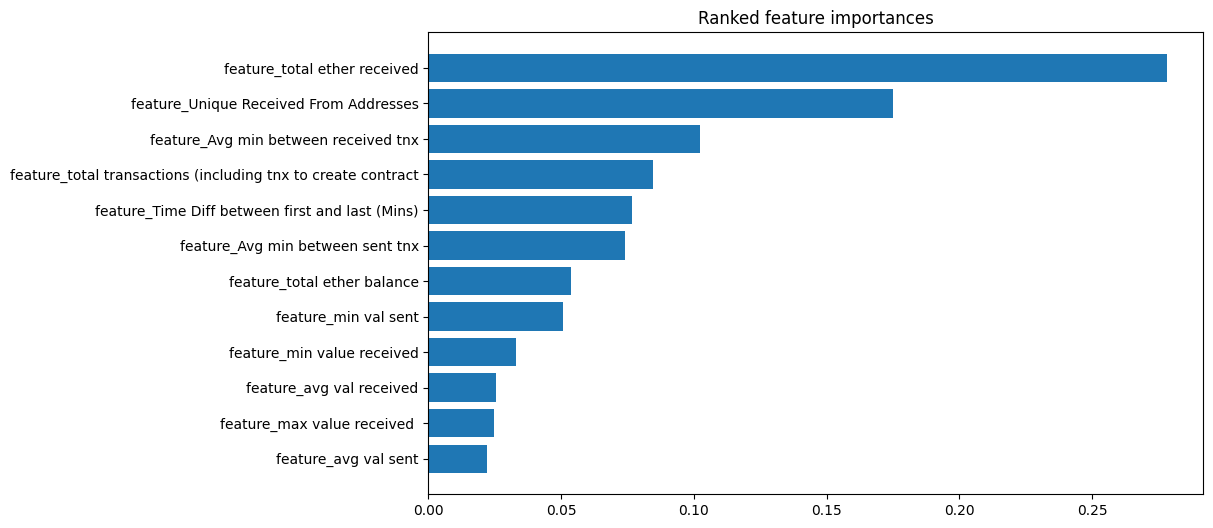

In [10]:
from matplotlib import pyplot as plt
feat_importances = tuned_clf.best_estimator_.feature_importances_
indices = np.argsort(feat_importances)
# plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Ranked feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices], align="center")
features = ['feature_{}'.format(columns[i]) for i in range(len(columns))]
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show();


In [11]:
tuned_clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [12]:
tuned_clf.best_score_

0.9277129516682235

In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

# Assuming tuned_clf is your tuned XGBoost classifier
y_pred = tuned_clf.predict(X_test)

# Calculate accuracy
xgb_accuracy_score = accuracy_score(y_test, y_pred)

# Calculate ROC AUC score
xgb_auc_score = roc_auc_score(y_test, y_pred)

# Calculate precision
xgb_precision = precision_score(y_test, y_pred)

# Calculate recall
xgb_recall = recall_score(y_test, y_pred)

# Print all metrics
print('XGBoost model metrics:')
print('Accuracy Score: {:.4f}'.format(xgb_accuracy_score))
print('ROC AUC Score: {:.4f}'.format(xgb_auc_score))
print('Precision Score: {:.4f}'.format(xgb_precision))
print('Recall Score: {:.4f}'.format(xgb_recall))


XGBoost model metrics:
Accuracy Score: 0.9385
ROC AUC Score: 0.9385
Precision Score: 0.9295
Recall Score: 0.9376


In [ ]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [ ]:
x_train_list = []
y_train_list = []
x_test_list = []
y_test_list = []


y_train_list= y_train[:10].tolist()
y_test_list = y_test[:10].tolist()

x_train_list = X_train[:10].tolist()
x_test_list = X_test[:10].tolist()

for i in range(10):
  print(y_train_list[i])
print(type(x_train_list))
print(type(y_train_list))

0
1
0
0
1
1
1
1
0
1
<class 'list'>
<class 'list'>


In [ ]:
num_features_train = len(x_train_list[i]) if isinstance(x_train_list[i], list) else 1
num_features_test = len(x_test_list[i]) if isinstance(x_test_list[i], list) else 1

print("Number of features in x_train_list[i]:", num_features_train)
print("Number of features in x_test_list[i]:", num_features_test)


Number of features in x_train_list[i]: 12
Number of features in x_test_list[i]: 12


In [ ]:
accuracy_and_auc_score_list = []

params = {
    'objective': ['binary:logistic'],
    'max_depth': [8],
    'learning_rate': [0.05],
    'n_estimators': [1000],
}

xgb_model = XGBClassifier()
tuned_xgb = GridSearchCV(xgb_model, params, n_jobs=5, scoring='roc_auc', refit=True)
tuned_xgb.fit(x_train_list, y_train_list)

for i in range(10):
    y_pred = tuned_xgb.predict(x_test_list)
    xgb_accuracy_score = accuracy_score(y_test_list, y_pred)
    xgb_auc_score = roc_auc_score(y_test_list, y_pred)
    item = [xgb_accuracy_score, xgb_auc_score]
    accuracy_and_auc_score_list.append(item)
    print('XGBoost model accuracy score: {0:.4f} and roc_auc score: {1:.4f}'.format(xgb_accuracy_score, xgb_auc_score))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


XGBoost model accuracy score: 0.4000 and roc_auc score: 0.3333
XGBoost model accuracy score: 0.4000 and roc_auc score: 0.3333
XGBoost model accuracy score: 0.4000 and roc_auc score: 0.3333
XGBoost model accuracy score: 0.4000 and roc_auc score: 0.3333
XGBoost model accuracy score: 0.4000 and roc_auc score: 0.3333
XGBoost model accuracy score: 0.4000 and roc_auc score: 0.3333
XGBoost model accuracy score: 0.4000 and roc_auc score: 0.3333
XGBoost model accuracy score: 0.4000 and roc_auc score: 0.3333
XGBoost model accuracy score: 0.4000 and roc_auc score: 0.3333
XGBoost model accuracy score: 0.4000 and roc_auc score: 0.3333


In [ ]:
model_performance = pd.DataFrame(accuracy_and_auc_score_list)
model_performance.columns = ['Accuracy score', 'Roc_auc score']
model_performance

,Accuracy score,Roc_auc score
0,0.4,0.333333
1,0.4,0.333333
2,0.4,0.333333
3,0.4,0.333333
4,0.4,0.333333
5,0.4,0.333333
6,0.4,0.333333
7,0.4,0.333333
8,0.4,0.333333
9,0.4,0.333333


In [ ]:
print('Mean Accuracy Score: {}'.format(model_performance['Accuracy score'].mean()))
print('Mean Roc_auc Score: {}'.format(model_performance['Roc_auc score'].mean()))

Mean Accuracy Score: 0.4
Mean Roc_auc Score: 0.33333333333333337


<ipython-input-89-0c762b8e9c71>:18: RuntimeWarning: divide by zero encountered in scalar divide
  'neg_liklihood_rate' : (fn/p)/(tn/n),
<ipython-input-89-0c762b8e9c71>:24: RuntimeWarning: divide by zero encountered in scalar divide
  'diagnostic_odds_ration' : ((tp/p)/(fp/n))/( (fn/p)/(tn/n)),


Model Confusion Matrix Statistics:

 recall: 0.6667

 false_neg_rate: 0.3333

 false_pos_rate: 1.0000

 true_neg_rate: 0.0000

 positive_liklihood_ratio: 0.6667

 neg_liklihood_rate: inf

 precision: 0.5000

 false_omission_rate: 1.0000

 false_discovery_rate: 0.5000

 neg_pred_value: 0.0000

 markedness: -0.5000

 diagnostic_odds_ration: 0.0000

 informedness: -0.3333

 prevalence_threshold: 0.5505

 prevalence: 0.6000

 accuracy: 0.4000

 balanced_accuracy: 0.3333

 F1_score: 0.5714

 fowlkes_mallows_index: 0.5774

 jaccard_index: 0.4000


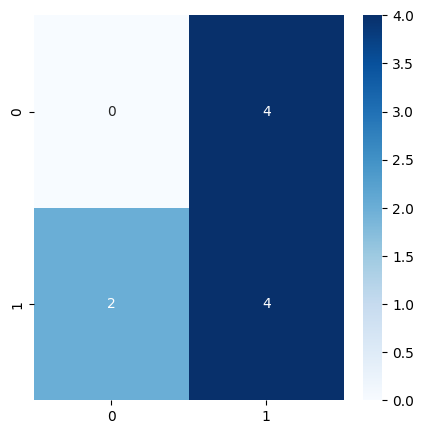

In [ ]:
def model_diagnostic_stats(confusion_matrix):
    tp = confusion_matrix[1,1]
    tn = confusion_matrix[0,0]
    fp = confusion_matrix[0,1]
    fn = confusion_matrix[1,0]

    p = tp + fn
    n = fp + tn
    pp = tp + fp
    pn = fn + tn

    diagnostic_dict = {
    'recall' : tp/p,
    'false_neg_rate' : fn/p,
    'false_pos_rate' : fp/n,
    'true_neg_rate' : tn/n,
    'positive_liklihood_ratio' : (tp/p)/(fp/n),
    'neg_liklihood_rate' : (fn/p)/(tn/n),
    'precision' : tp/pp,
    'false_omission_rate' : fn/pn,
    'false_discovery_rate' : fp/pp,
    'neg_pred_value' : tn/pn,
    'markedness' : (tp/pp)+(tn/pn)-1,
    'diagnostic_odds_ration' : ((tp/p)/(fp/n))/( (fn/p)/(tn/n)),
    'informedness' : (tp/p)+(tn/n)-1,
    'prevalence_threshold' : (sqrt((tp/p)*(fp/n))-(fp/n))/((tp/p)-(fp/n)),
    'prevalence' : p/(p+n),
    'accuracy' : (tp+tn)/(p+n),
    'balanced_accuracy' : ((tp/p)+(tn/n))/2,
    'F1_score' : 2*tp/(2*tp+fp+fn),
    'fowlkes_mallows_index' : sqrt((tp/pp)*(tp/p)),
    'jaccard_index' : tp/(tp+fn+fp),
    }

    return diagnostic_dict
cm_matrix = confusion_matrix(y_test_list,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(cm_matrix,annot=True,fmt='g',cmap="Blues")
stats = model_diagnostic_stats(cm_matrix)
print('Model Confusion Matrix Statistics:')
for key,value in stats.items():
    value_str = '%.4f' % value
    print("\n {}: {}".format(key,value_str))


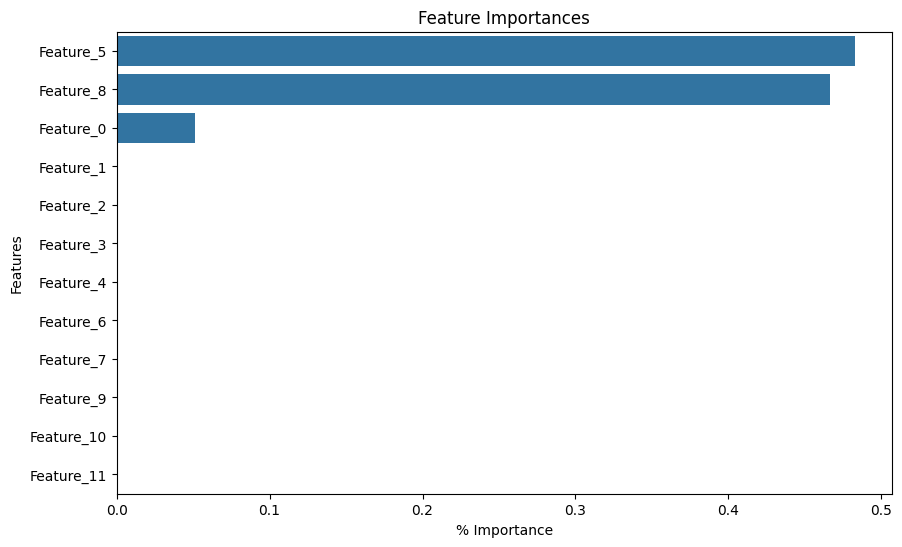

In [ ]:
import seaborn as sns
feature_importances = tuned_xgb.best_estimator_.feature_importances_

# Create a list of feature names
column_var = ["Feature_{}".format(i) for i in range(len(feature_importances))]

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Features': column_var, '% Importance': feature_importances})

# Sort the DataFrame by % Importance
feature_importance_df.sort_values(by='% Importance', ascending=False, inplace=True)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='% Importance', y='Features', data=feature_importance_df)
ax.set(xlabel='% Importance', ylabel='Features')
plt.title('Feature Importances')
plt.show()